# Supervised Learning: Classification

### Acknowledgements: Usman Alim 



Further Reading:

* `scikit-learn`: [user guide](https://scikit-learn.org/stable/user_guide.html).


## Quick Overview of scikit-learn

- [`scikit-learn`](https://scikit-learn.org/stable/) is the main machine learning library in the Python data science ecosystem.
- Implements many supervised (classification, regression) and unsupervised (clustering, density estimation, dimensionality reduction) learning algorithms.
- Relies heavily on `numpy`. Inputs and outputs are numpy arrays.
- Input data are expected to be $n \times D$ numerical arrays where $n$ is the number of observations, and $D$ is the number of features.
- Some feature wrangling may be needed, provides methods for feature extraction. 

In [1]:
# p_data['Tweet'] = data['Tweet'].str.replace('[^a-zA-Z]', ' ')
# p_data

# p_data['Tweet'] = p_data['Tweet'].apply(lambda x: x.lower())
# p_data

In [2]:
# from nltk.stem import SnowballStemmer
# import string

# stopwords = set(stopwords.words('english'))
# stemmer = SnowballStemmer('english')
# # data['Tweet'] = p_data['Tweet'].apply(word_tokenize)

# def preprocess_text(text):
#     # Remove punctuation
#     text = text.translate(str.maketrans('', '', string.punctuation))
    
#     # Convert to lowercase
#     text = text.lower()
    
#     # Remove stopwords and stem words
#     words = [stemmer.stem(word) for word in text.split() if word not in stopwords]
#     return ' '.join(words)

# p_data['preprocessed_text'] = p_data['Tweet'].apply(preprocess_text)

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:

# Data processing related imports
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# model related imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [116]:
# # load the dataset from the url into pandas dataframe
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'label']
data = pd.read_csv('train.csv')
display(data)
data = data.drop(data.columns[7], axis=1)
data = data[data['Type'] != 'South Dakota']

display(data)

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality,NaN
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam,NaN
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality,NaN
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality,NaN
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality,NaN
...,...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam,NaN
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality,NaN
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam,NaN
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality,NaN


,Tweet,following,followers,actions,is_retweet,location,Type
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality
...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality


In [117]:
# Creating DataFrame
p_data = pd.DataFrame(columns=['Tweet', 'following', 'followers', 'actions', 'is_retweet', 'location', 'Type'])
p_data = p_data.append(data)

C:\Users\faii_\AppData\Local\Temp\ipykernel_10256\19220836.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_data = p_data.append(data)


In [118]:
# Processing data for model

import string
import re

def preprocess_text(raw_tweet):
    # Remove punctuation
    new_string = []
    for word in raw_tweet:
        # Check if the word is a URL
        if "https://" in word or "http://" in word:
            new_string.append(word)
        else:
            word = re.sub(r"[^A-Za-z0-9.\-]", " ", word)
            new_string.append(word)

    # Join the list of words into a string
    string1 = "".join(new_string)
    
    # Replace multiple spaces with a single space
    string1 = re.sub(r"\s+", " ", string1)
    
#     # Remove leading and trailing spaces
#     string1 = string1.strip()
    
    # Convert to lowercase
    string1 = string1.lower()

    return string1

p_data['preprocessed_text'] = p_data['Tweet'].apply(preprocess_text)
p_data

,Tweet,following,followers,actions,is_retweet,location,Type,preprocessed_text
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality,good morning love leebrown v
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam,realdonaldtrump usnavy rip to heroes
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality,haven t been following the news but i understa...
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality,pic.twitter.com dy9q4ftlhz what to do with pap...
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality,didyouknow mahatma gandhi made a brief visit ...
...,...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam,allwentwrongwhen i told my hair stylist to go...
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality,they don t have to like you and you don t have...
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam,miami graham nash live at parker playhouse local
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality,bethannhamilton is in the business of one-upp...


In [119]:
p_data['preprocessed_text'].head(20)

0                          good morning love leebrown v
1                 realdonaldtrump usnavy rip to heroes 
2     haven t been following the news but i understa...
3     pic.twitter.com dy9q4ftlhz what to do with pap...
4      didyouknow mahatma gandhi made a brief visit ...
5      amms samantha bee tries to attack trump inste...
6     please don t talk about me like that i m only ...
7     politicshttps twitter.com ngunjiriwambugu stat...
8     banking on brexit is it time to invest in the ...
9     they are serving and protecting 5wordregrets h...
10                            beauty is not in the face
11                           dancing for your pleasure.
12    americas most forgotten families speak out we ...
13     icantbeurfriendbecause it s better to be alon...
14     sextingwentwrongwhen i tried to text mcdonald...
15     occupythebay13 breakingnews blacklivesmatter ...
16    your social calendar in chicago bohemian house...
17    i keep up with the kardashians because... 

In [121]:
# Get the feature('Tweet') and lable ('Type') data from a Training and Test dataset
# We use 80% of the dataset to train a model, and use the rest to test the model predictions

# X_train, X_test, y_train, y_test = train_test_split(p_data['preprocessed_text'], 
#                                                     p_data['Type'], test_size=.20, random_state=70)

# random_state = 70 gave us the best accuracy so far. tried varies mubers like  30, 50, 60, 80, 90

# splitting data and writing into csv file for consistent outputs. 



# X_train, X_test = train_test_split(p_data, test_size=.20, random_state=70)

# X_train.to_csv('train80.csv', index=False)
# X_test.to_csv('test20.csv', index=False)


In [124]:
train_data = pd.read_csv('train80.csv')
test_data = pd.read_csv('test20.csv')


X_train = train_data['preprocessed_text']
y_train = train_data['Type']

X_test = test_data['preprocessed_text']
y_test = test_data['Type']

In [125]:
# Initialize the vectorizer with desired parameters
c_vec = CountVectorizer(max_features=1000)


# Fit and transform the preprocessed text
c_vec_train = c_vec.fit_transform(X_train)
c_vect_test = c_vec.transform(X_test)


In [126]:
# Vectorize tweets using TfidfVectorizer

tfid_vectorizer = TfidfVectorizer()

tf_vec_train = tfid_vectorizer.fit_transform(X_train)
tf_vec_test = tfid_vectorizer.transform(X_test)


In [127]:
# Defining Naive Bayes classifier 
nb = MultinomialNB()

In [129]:
# Train a Naive Bayes classifier on the count vectorized text
nb.fit(c_vec_train, y_train)

# Use the trained classifier to make predictions on the vectorized new text data
pred_y_NB_cv = nb.predict(c_vect_test)

# Compute the accuracy score of the predicted labels
accuracy = accuracy_score(y_test, pred_y_NB_cv)
print("Accuracy by NB using Count Vectorizer: ", accuracy * 100 , "%")

Accuracy by NB using Count Vectorizer:  89.93288590604027 %


In [130]:
# Train a Naive Bayes classifier on the tf vectorized text

nb.fit(tf_vec_train, y_train)

# Use the trained classifier to make predictions on the vectorized new text data
pred_y_NB_tf = nb.predict(tf_vec_test)

# Compute the accuracy score of the predicted labels
accuracy = accuracy_score(y_test, pred_y_NB_tf)
print("Accuracy by NB using tf Vectorizer: ", accuracy * 100 , "%")

Accuracy by NB using tf Vectorizer:  88.75838926174497 %


# Visualizing the results

- We can visualize the results using a confusion matrix
- The confusion matrix tells us exactly how many of each type of flowers the model predicted and what the correct answers are

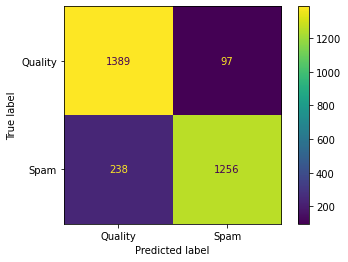

In [131]:
cm = confusion_matrix(y_test, pred_y_NB_tf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()

plt.show()

Uisng SVC and tfidvectorizer

In [132]:
clf = SVC(kernel='linear', C=1, gamma='auto')

In [133]:
# Train SVM model using count vector
clf.fit(c_vec_train, y_train)

pred_Y_SVC_cv = clf.predict(c_vect_test)

# Evaluate model
accuracy = accuracy_score(y_test, pred_Y_SVC)
print("Accuracy by SVC using Count Vectorizer:", accuracy * 100, "%")

Accuracy by SVC using Count Vectorizer: 89.32885906040269 %


In [134]:
# Train SVM model using Tf vector

clf.fit(tf_vec_train, y_train)

pred_Y_SVC_tf = clf.predict(tf_vec_test)

# Evaluate model
accuracy = accuracy_score(y_test, pred_Y_SVC_tf)
print("Accuracy by SVC using Tf Vectorizer:", accuracy * 100, "%")

Accuracy by SVC using Tf Vectorizer: 91.40939597315436 %


# Testing with Unseen data

In [ ]:
# read the Test data

unseen_data = pd.read_csv('test.csv')

#  add column fot processing the tweet data.


unseen_data['preprocessed_text'] = unseen_data['Tweet'].apply(preprocess_text)

unSeen_X_test = unseen_data['preprocessed_text']
v_unseen_tweet = vectorizer.transform(unSeen_X_test)

unseen_data


In [ ]:
pred_labels_2 = nb.predict(v_unseen_tweet)

In [ ]:
X_tfidfVec = tfid_vectorizer.transform(unseen_data['preprocessed_text'])

unseen_data['Type_SVC'] = clf.predict(X_tfidfVec)

In [ ]:
unseen_data['Type_NB'] = pred_labels_2
unseen_data

In [ ]:
# score = nb.score(vectorized_tweet_test, y_test)
# print("Accuracy: {:.2f}%".format(score * 100))